In [ ]:
# PARAM SHIV ASHISH
# SE22MAID002
# MTECH AI AND DS
print("NAME : PARAM SHIV ASHISH")
print("ROLL NUMBER : SE22MAID002")
print("MTECH AI AND DS")

NAME : PARAM SHIV ASHISH
ROLL NUMBER : SE22MAID002
MTECH AI AND DS


            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
1703-12-31         23.0
1704-12-31         36.0
1705-12-31         58.0
1706-12-31         29.0
1707-12-31         20.0
1708-12-31         10.0
1709-12-31          8.0

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



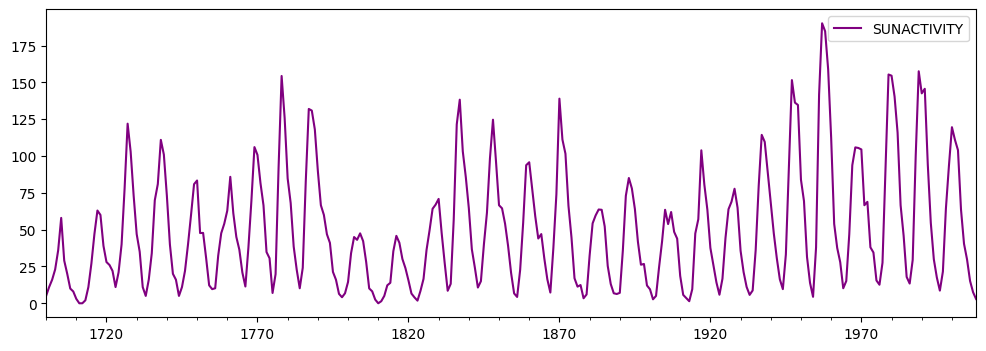

In [ ]:
#IMPORTING REQUIRED LIBRARIES
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

#Loading SUN SPOTS DATASET FRIN STATSMODEL LIBRARY
sunSpots = sm.datasets.sunspots.load_pandas().data
#PREPARE THE DATAFRAME BY REPLACING THE INDEX WITH YEARS
sunSpots.index = pd.Index(pd.date_range("1700", end="2009", freq="A-DEC"))
del sunSpots["YEAR"]

#DISPLAY SUN SPOTS DATAFRAME
print(f"{sunSpots.head(10)}\n")
sunSpots.plot(figsize=(12,4),c="purple");

#DATA NOTE ON SUN SPOTS DATASET
print(sm.datasets.sunspots.NOTE)

DURBIN-WATSON TEST VALUE - 0.13952892659903304



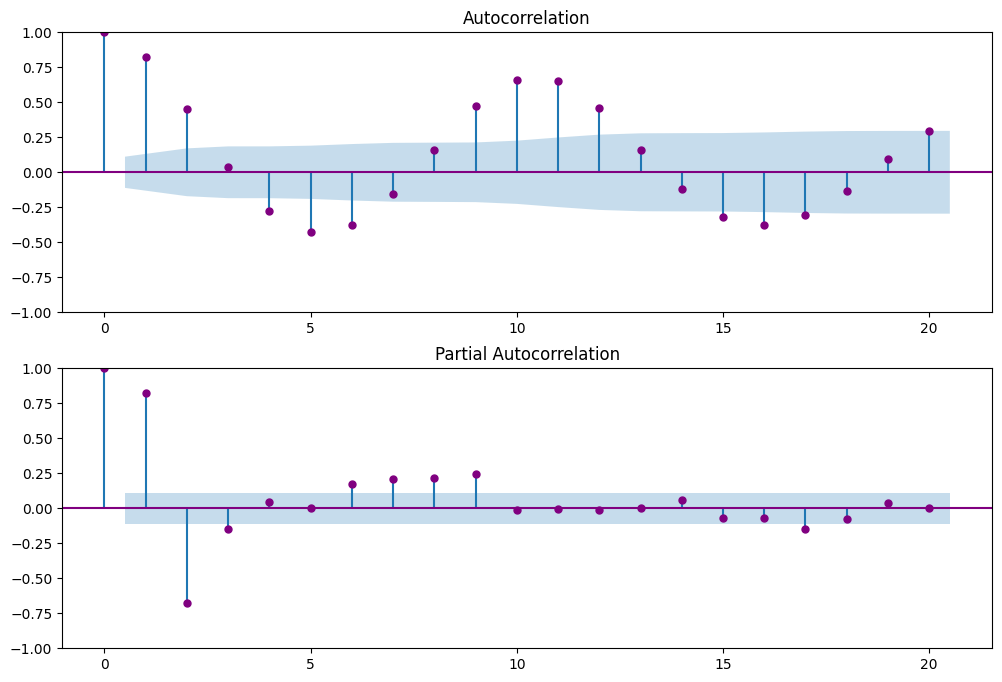

In [ ]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(211)
#AUTOCORRELATION FUNCTION FROM STATSMODEL LIBRARY
fig = sm.graphics.tsa.plot_acf(sunSpots.values.squeeze(), lags=20, ax=ax,c="purple")

ax = fig.add_subplot(212)
#PARTIAL AUTOCORRELATION FUNCTION FROM STATSMODEL LIBRARY
fig = sm.graphics.tsa.plot_pacf(sunSpots, lags=20, ax=ax,c = "purple")

# DURBIN-WATSON TEST
# VALUE 0 - STRONG POSITIVE AUTOCORRELATION
# VALUE 2 - NO AUTOCORRELATION
# VALUE 0 - STRONG NEGATIVE AUTOCORRELATION
print(f"DURBIN-WATSON TEST VALUE - {sm.stats.durbin_watson(sunSpots)[0]}\n")

In [ ]:
#TRAINING A SARIMA MODEL USINF STATSMODEL LIBRARY
sarima = sm.tsa.statespace.SARIMAX(sunSpots, order=(2,0,0), trend='c').fit(disp=False)

#PRINTING PARAMETERS POST TRAINING
print(sarima.params)
print(sarima.aic, sarima.bic, sarima.hqic)
print()

# DURBIN-WATSON TEST
# VALUE 0 - STRONG POSITIVE AUTOCORRELATION
# VALUE 2 - NO AUTOCORRELATION
# VALUE 0 - STRONG NEGATIVE AUTOCORRELATION
print(f"DURBIN-WATSON TEST VALUE - {sm.stats.durbin_watson(sarima.resid)}\n")

intercept     14.793947
ar.L1          1.390659
ar.L2         -0.688568
sigma2       274.761104
dtype: float64
2622.636338141591 2637.5697032491817 2628.606725986837

DURBIN-WATSON TEST VALUE - 2.145833361684828



Mean Forecasting Error : 5.14252188594846
Mean Absolute Error : 0.15155688203310153



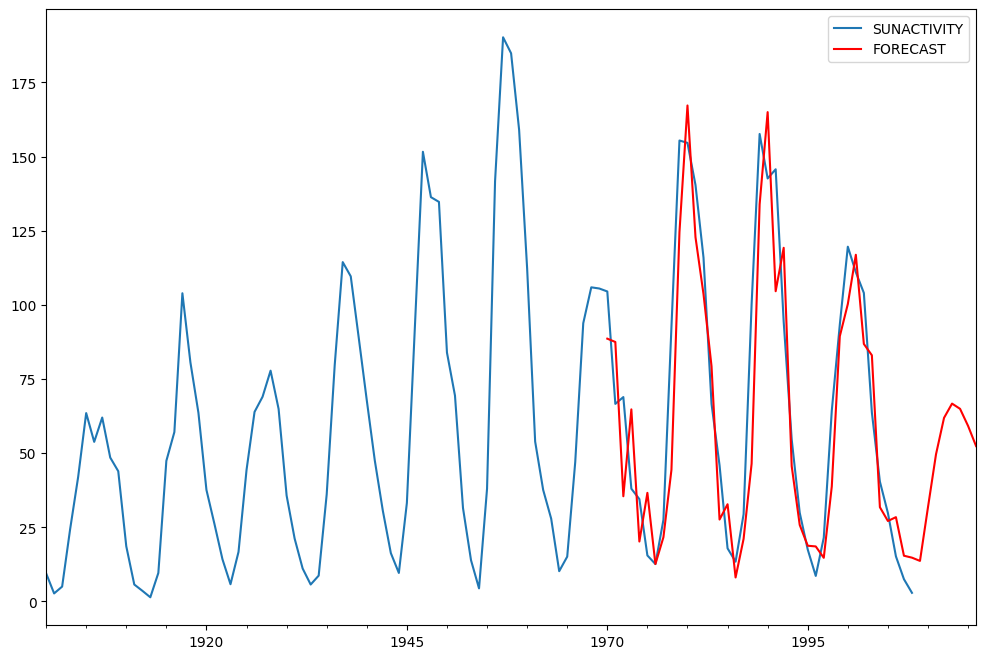

In [ ]:
#FORECASTING FROM 1980 TO 2012
forecastResults = sarima.predict(start='1970', end='2016', dynamic=False)
fig, ax = plt.subplots(figsize=(12, 8))
sunSpots.loc['1900':].plot(ax=ax)
forecastResults.plot(ax=ax, style='red', label='FORECAST');
ax.legend()

#CALCULATING MEAN FORECASTING ERROR
def mfe(actual, pred):
  res = actual.sub(pred).mean()
  return res
print(f"Mean Forecasting Error : {mfe(sunSpots.SUNACTIVITY, forecastResults)}")

#CALCULATING MEAN ABSOLUTE ERROR
def mae(actual , pred):
  res = np.mean((np.abs(actual.sub(pred).mean()) / pred))
  return res
print(f"Mean Absolute Error : {mae(sunSpots.SUNACTIVITY, forecastResults)}\n")

In [ ]:
!pip install pmdarima

In [ ]:
#AUTO ARIMA
#ALTERNATIVE BUT BETTER APPROXIMATION AS WE ARE OPTIMIZING THE P Q AND D VALUES
import pmdarima as pm

#Loading SUN SPOTS DATASET FRIN STATSMODEL LIBRARY
sunSpots = sm.datasets.sunspots.load_pandas().data
#PREPARE THE DATAFRAME BY REPLACING THE INDEX WITH YEARS COLUMN
sunSpots.index = pd.Index(pd.date_range("1700", end="2009", freq="A-DEC"))
del sunSpots["YEAR"]

#TRAINING AN AUTO ARIMA MODEL
autoArima = pm.auto_arima(sunSpots.SUNACTIVITY, start_p=1, start_q=1,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

#TRAINING ARIMA WITH BEST P Q AND D VALUES
from statsmodels.tsa.arima.model import ARIMA
print("TRAINING ARIMA WITH BEST P Q AND D VALUES")
bestModel = ARIMA(sunSpots, order=(3, 0, 2)).fit()
print("MODEL SUMMARY")
print(bestModel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2736.311, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3449.876, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2834.324, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3114.512, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2700.184, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2701.041, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2622.939, Time=0.31 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2697.685, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2587.589, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2691.581, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2695.576, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2693.241, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2622.121, Time=0.41 sec

Best model:  ARIMA(3,0,2)(0,0,0)[0]          
Total fit time: 2.425 seconds
TRAINING ARIMA WITH BE

Mean Forecasting Error : 5.746089733581095
Mean Absolute Error : 0.16674453939635245



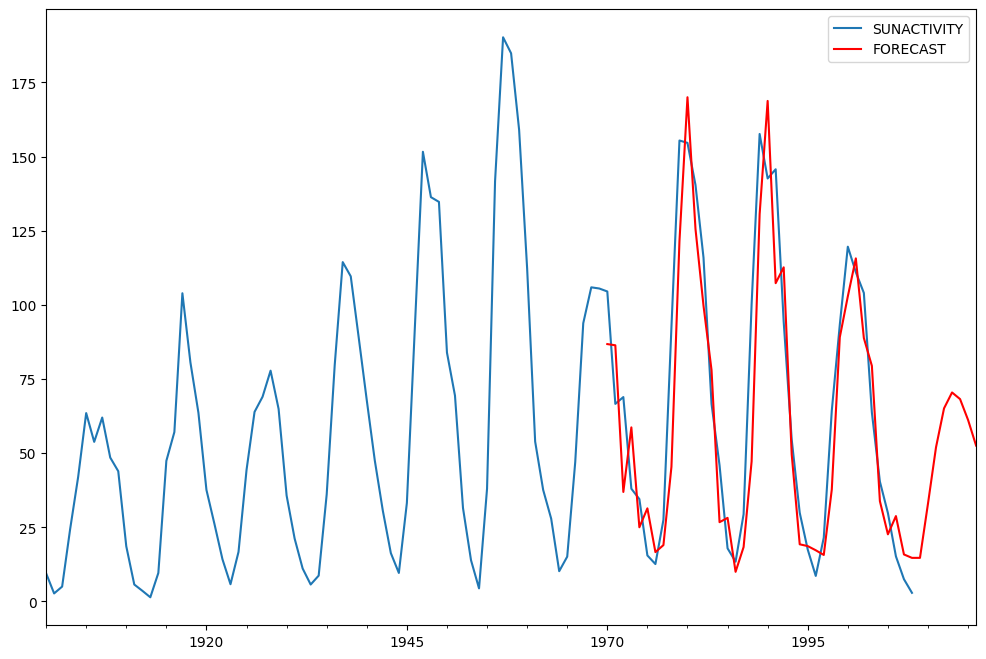

In [ ]:
#AUTO ARIMA
#FORECASTING FROM 1980 TO 2012
forecastResults = bestModel.predict(start='1970', end='2016', dynamic=False)
fig, ax = plt.subplots(figsize=(12, 8))
sunSpots.loc['1900':].plot(ax=ax)
forecastResults.plot(ax=ax, style='red', label='FORECAST');
ax.legend()

#CALCULATING MEAN FORECASTING ERROR
def mfe(actual, pred):
  res = actual.sub(pred).mean()
  return res
print(f"Mean Forecasting Error : {mfe(sunSpots.SUNACTIVITY, forecastResults)}")

#CALCULATING MEAN ABSOLUTE ERROR
def mae(actual , pred):
  res = np.mean((np.abs(actual.sub(pred).mean()) / pred))
  return res
print(f"Mean Absolute Error : {mae(sunSpots.SUNACTIVITY, forecastResults)}\n")